# DNMT3A Subgroup Scores + Relative Error Plots 

### Runs the DNMT3A subgroup simulation for 200,000 steps with 0.05 noise. Then calculates the apoptosis, proliferation, differentiation, and network scores for all 200,000 steps and creates the relative error plots

### Importing the BMatrix and BooleanNetwork code

In [22]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

# import booleanNetwork module from ./src
import sys
sys.path.append('C:/Users/15167/OneDrive/Documents/ISB/AML-DT-BNM/jupyter_notebook/Python/BooleanNetwork/')
import booleanNetwork as bn
import BMatrix  #this is the code I made

### Creating the BNM using the BMatrix code

In [23]:
file = 'C:/Users/15167/OneDrive/Documents/ISB/dnmt3a_equations.txt' #does not have the equations at the end

equations = BMatrix.getting_equations(file)
gene_dict = BMatrix.gene_dictionary(equations)
only_genes = BMatrix.getting_only_genes(equations)

varF = BMatrix.connectivity_matrix(equations,only_genes,gene_dict)
varF = np.array(varF)
#print(varF)

F = BMatrix.extracting_truth_table(equations,only_genes)
F = np.array(F)
#print(F)

ngenes= len(equations)

# initial state
x0 = np.random.randint(2, size=ngenes) #random inital state 
x0 = np.array(x0)
#print(x0)

### Preparing variables needed to calculate after simulation

In [24]:
file_equations = 'C:/Users/15167/OneDrive/Documents/ISB/calculating_equations.txt'

equations = BMatrix.getting_equations(file_equations)
cal_functions = BMatrix.calculating_functions(equations)
cal_only_genes = BMatrix.calculating_only_genes(equations)

## Testing different amount of steps and noise with relative error

### Original (0.05 noise and 200,000 steps)

In [25]:
%%time

network = bn.BooleanNetwork( ngenes , varF, F, x0  ) # create a Boolean network object
noise_level = 0.05 # noise
y = network.update_noise ( noise_level  , 200000) # simulation with noise

CPU times: total: 21.3 s
Wall time: 21.3 s


In [26]:
%%time

y_range = y #all of the y values (for relative error plot)
scores_dict = BMatrix.calculating_scores(y, cal_functions, cal_only_genes, gene_dict, y_range)

CPU times: total: 26.5 s
Wall time: 26.5 s


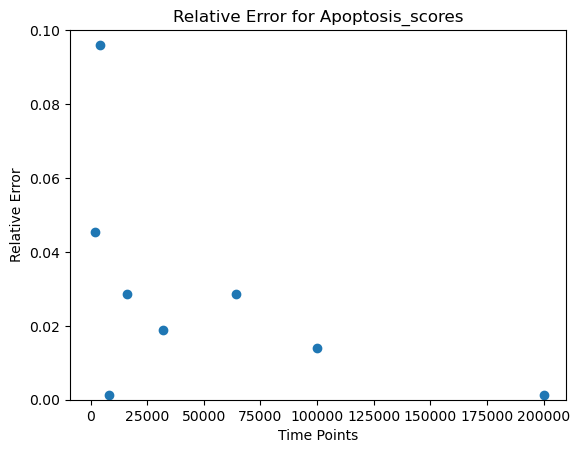

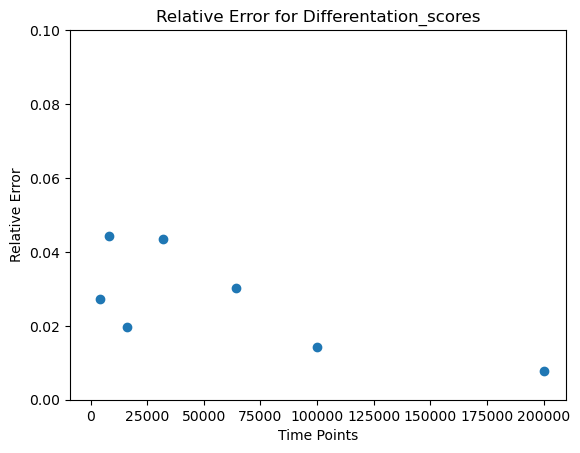

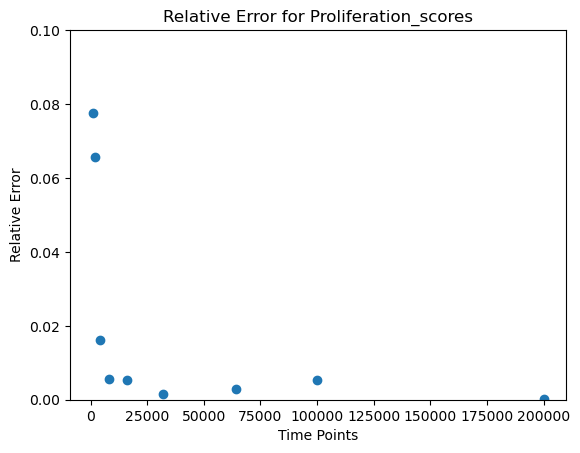

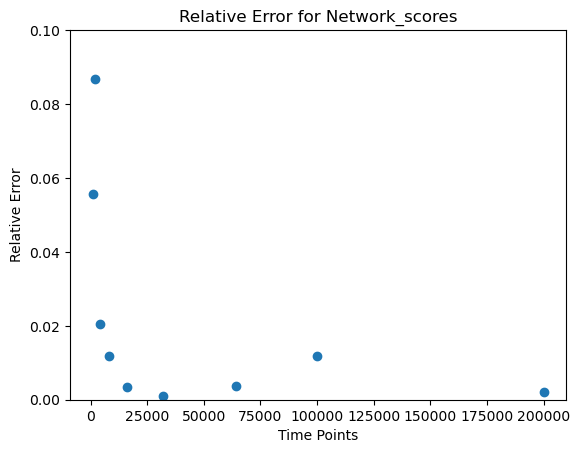

In [27]:
#getting the relative error points to see if the score converges
Apoptosis_scores = scores_dict['Apoptosis']
Differentiation_scores = scores_dict['Differentiation']
Proliferation_scores = scores_dict['Proliferation']
Network_scores = scores_dict['Network']

scores = [Apoptosis_scores, Differentiation_scores, Proliferation_scores, Network_scores]
time_points = [1000, 2000, 4000, 8000, 16000, 32000, 64000, 100000, 200000]

plot_title = {0:'Apoptosis_scores',
              1:'Differentation_scores',
              2: 'Proliferation_scores',
              3: 'Network_scores'}

#print(plot_title)
#print(time_points)

for i in range(len(scores)): #for apop, diff, prolif, or final
    values = [] 
    relative_error = [] #reset the values
    score = scores[i]
    
    title = plot_title[i]
    #print(title)
    
    for i in range(len(time_points)): #for all time points
        point = time_points[i]
        half = (time_points[i])//2
        start_index = slice(0,half) #so for i=1, this is 1:500
        end_index = slice(half,point) #if i=1, this is 500:1000
        
        point = (abs((np.mean(score[start_index])) - (np.mean(score[end_index]))))/(np.mean(score[start_index]))
        
        values.append(point)
    
    relative_error = [np.round(value, decimals=4) for value in values]
    #print(relative_error)  
    
    plot = pd.DataFrame({'time_points': time_points, 'relative_error': relative_error})
    plt.scatter(plot['time_points'], plot['relative_error'])
    plt.xlabel('Time Points')
    plt.ylabel('Relative Error')
    plt.title('Relative Error for ' + title)
    plt.ylim(0, 0.1)
    plt.show()

### Less noise (0.01 noise and 200,000 steps)

In [28]:
%%time

network = bn.BooleanNetwork( ngenes , varF, F, x0  ) # create a Boolean network object

#### less noise
noise_level = 0.01 # noise
y = network.update_noise ( noise_level  , 200000) # simulation with noise

CPU times: total: 31.8 s
Wall time: 31.8 s


In [29]:
%%time

y_range = y #all of the y values (for relative error plot)
scores_dict = BMatrix.calculating_scores(y, cal_functions, cal_only_genes, gene_dict, y_range)

CPU times: total: 26.2 s
Wall time: 26.2 s


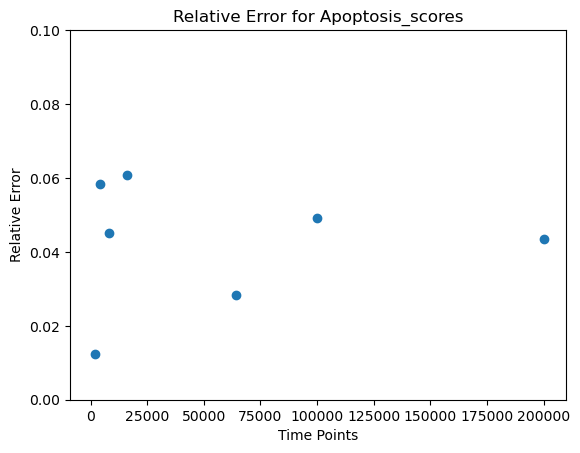

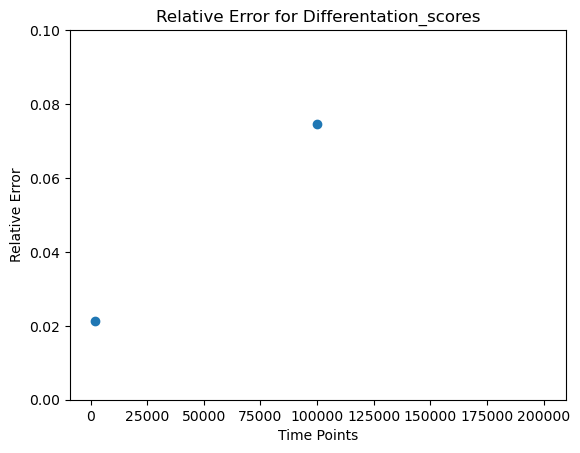

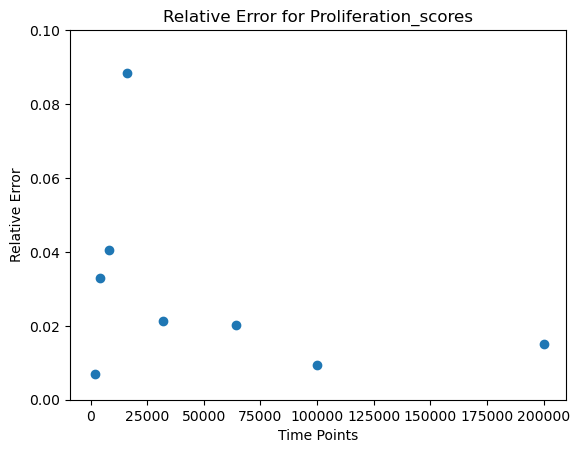

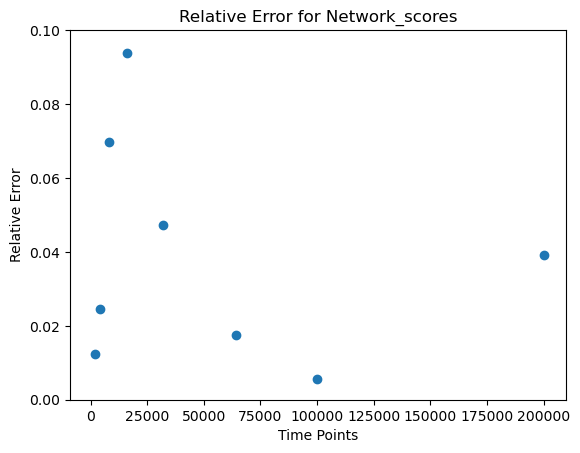

In [30]:
#getting the relative error points to see if the score converges
Apoptosis_scores = scores_dict['Apoptosis']
Differentiation_scores = scores_dict['Differentiation']
Proliferation_scores = scores_dict['Proliferation']
Network_scores = scores_dict['Network']

scores = [Apoptosis_scores, Differentiation_scores, Proliferation_scores, Network_scores]
time_points = [1000, 2000, 4000, 8000, 16000, 32000, 64000, 100000, 200000]

plot_title = {0:'Apoptosis_scores',
              1:'Differentation_scores',
              2: 'Proliferation_scores',
              3: 'Network_scores'}

#print(plot_title)
#print(time_points)

for i in range(len(scores)): #for apop, diff, prolif, or final
    values = [] 
    relative_error = [] #reset the values
    score = scores[i]
    
    title = plot_title[i]
    #print(title)
    
    for i in range(len(time_points)): #for all time points
        point = time_points[i]
        half = (time_points[i])//2
        start_index = slice(0,half) #so for i=1, this is 1:500
        end_index = slice(half,point) #if i=1, this is 500:1000
        
        point = (abs((np.mean(score[start_index])) - (np.mean(score[end_index]))))/(np.mean(score[start_index]))
        
        values.append(point)
    
    relative_error = [np.round(value, decimals=4) for value in values]
    #print(relative_error)  
    
    plot = pd.DataFrame({'time_points': time_points, 'relative_error': relative_error})
    plt.scatter(plot['time_points'], plot['relative_error'])
    plt.xlabel('Time Points')
    plt.ylabel('Relative Error')
    plt.title('Relative Error for ' + title)
    plt.ylim(0, 0.1)
    plt.show()

### Less steps (0.05 noise and 100,000 steps)

In [31]:
%%time

network = bn.BooleanNetwork( ngenes , varF, F, x0  ) # create a Boolean network object

##### less steps
noise_level = 0.05 # noise
y = network.update_noise ( noise_level  , 100000) # simulation with noise

CPU times: total: 10.4 s
Wall time: 10.4 s


In [32]:
%%time

y_range = y #all of the y values (for relative error plot)
scores_dict = BMatrix.calculating_scores(y, cal_functions, cal_only_genes, gene_dict, y_range)

CPU times: total: 13 s
Wall time: 13.1 s


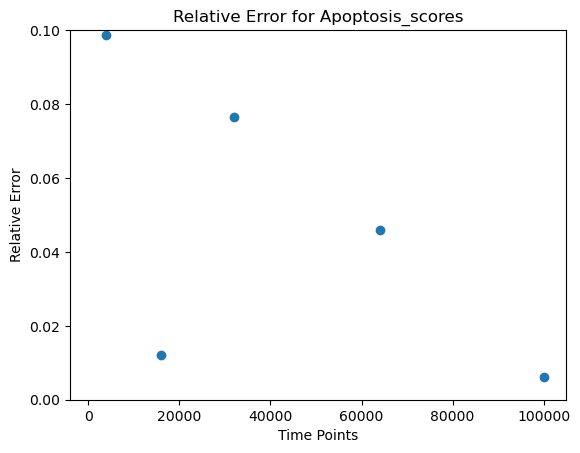

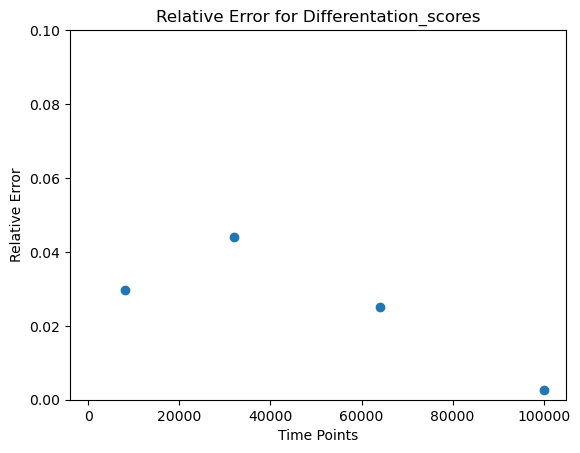

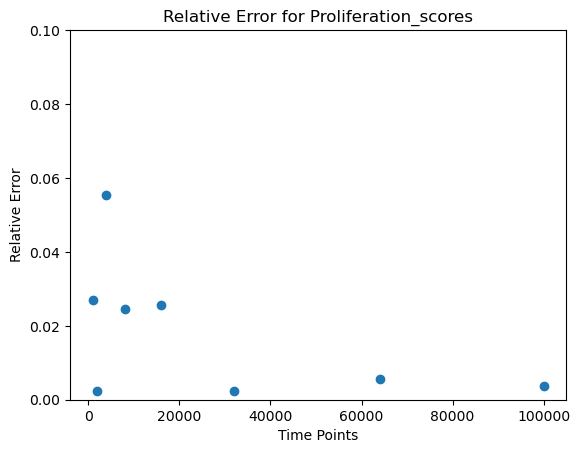

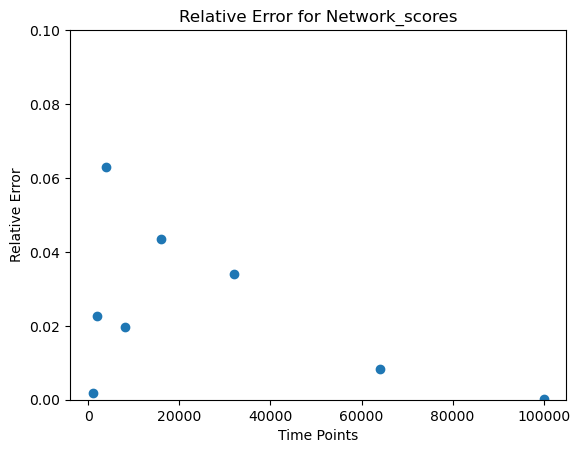

In [33]:
#getting the relative error points to see if the score converges
Apoptosis_scores = scores_dict['Apoptosis']
Differentiation_scores = scores_dict['Differentiation']
Proliferation_scores = scores_dict['Proliferation']
Network_scores = scores_dict['Network']

scores = [Apoptosis_scores, Differentiation_scores, Proliferation_scores, Network_scores]
time_points = [1000, 2000, 4000, 8000, 16000, 32000, 64000, 100000]

plot_title = {0:'Apoptosis_scores',
              1:'Differentation_scores',
              2: 'Proliferation_scores',
              3: 'Network_scores'}

#print(plot_title)
#print(time_points)

for i in range(len(scores)): #for apop, diff, prolif, or final
    values = [] 
    relative_error = [] #reset the values
    score = scores[i]
    
    title = plot_title[i]
    #print(title)
    
    for i in range(len(time_points)): #for all time points
        point = time_points[i]
        half = (time_points[i])//2
        start_index = slice(0,half) #so for i=1, this is 1:500
        end_index = slice(half,point) #if i=1, this is 500:1000
        
        point = (abs((np.mean(score[start_index])) - (np.mean(score[end_index]))))/(np.mean(score[start_index]))
        
        values.append(point)
    
    relative_error = [np.round(value, decimals=4) for value in values]
    #print(relative_error)  
    
    plot = pd.DataFrame({'time_points': time_points, 'relative_error': relative_error})
    plt.scatter(plot['time_points'], plot['relative_error'])
    plt.xlabel('Time Points')
    plt.ylabel('Relative Error')
    plt.title('Relative Error for ' + title)
    plt.ylim(0, 0.1)
    plt.show()

### Less of both (0.01 noise and 100,000 steps)

In [34]:
%%time

network = bn.BooleanNetwork( ngenes , varF, F, x0  ) # create a Boolean network object

##### less noise and less steps
noise_level = 0.01 # noise
y = network.update_noise ( noise_level  , 100000) # simulation with noise
#print(y)

CPU times: total: 15.9 s
Wall time: 15.9 s


In [35]:
%%time

y_range = y #all of the y values (for relative error plot)
scores_dict = BMatrix.calculating_scores(y, cal_functions, cal_only_genes, gene_dict, y_range)

CPU times: total: 13 s
Wall time: 13 s


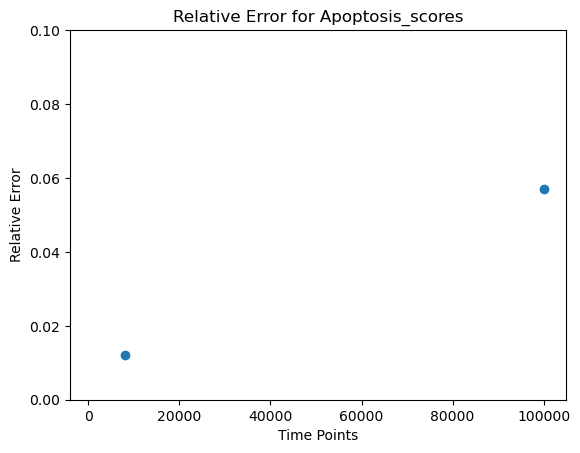

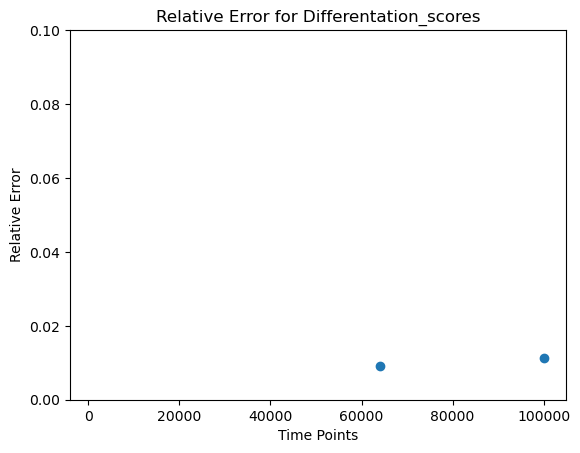

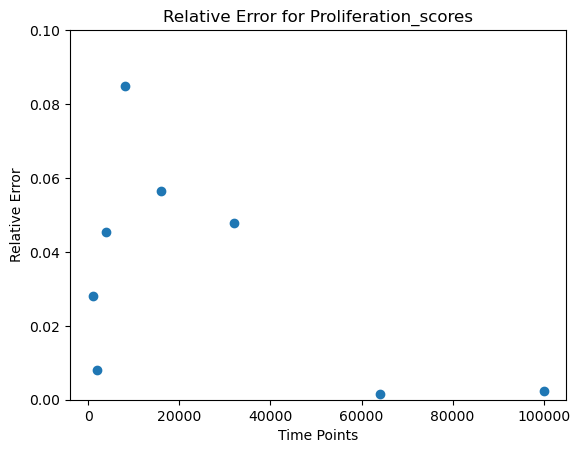

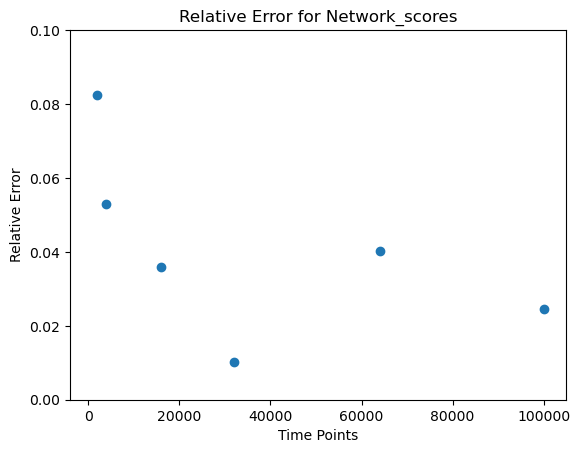

In [36]:
#getting the relative error points to see if the score converges
Apoptosis_scores = scores_dict['Apoptosis']
Differentiation_scores = scores_dict['Differentiation']
Proliferation_scores = scores_dict['Proliferation']
Network_scores = scores_dict['Network']

scores = [Apoptosis_scores, Differentiation_scores, Proliferation_scores, Network_scores]
time_points = [1000, 2000, 4000, 8000, 16000, 32000, 64000, 100000]

plot_title = {0:'Apoptosis_scores',
              1:'Differentation_scores',
              2: 'Proliferation_scores',
              3: 'Network_scores'}

#print(plot_title)
#print(time_points)

for i in range(len(scores)): #for apop, diff, prolif, or final
    values = [] 
    relative_error = [] #reset the values
    score = scores[i]
    
    title = plot_title[i]
    #print(title)
    
    for i in range(len(time_points)): #for all time points
        point = time_points[i]
        half = (time_points[i])//2
        start_index = slice(0,half) #so for i=1, this is 1:500
        end_index = slice(half,point) #if i=1, this is 500:1000
        
        point = (abs((np.mean(score[start_index])) - (np.mean(score[end_index]))))/(np.mean(score[start_index]))
        
        values.append(point)
    
    relative_error = [np.round(value, decimals=4) for value in values]
    #print(relative_error)  
    
    plot = pd.DataFrame({'time_points': time_points, 'relative_error': relative_error})
    plt.scatter(plot['time_points'], plot['relative_error'])
    plt.xlabel('Time Points')
    plt.ylabel('Relative Error')
    plt.title('Relative Error for ' + title)
    plt.ylim(0, 0.1)
    plt.show()